# Import Library dari Pandas, Numpy, Matplotlib, dan Seaborn

In [ ]:
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns


# Load dan Read Dataset

In [ ]:
# load the dataset
df = pd.read_csv("dataset/student-mat.csv")

# print the first 5 rows of the dataframe.
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Tujuan pembuatan model ini adalah untuk memprediksi nilai akhir dari siswa berdasarkan data yang berhubungan dengan data pendukung nilai akhir siswa

In [ ]:
# deskripsi dari dataset 

# data information
# school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
# sex - student's sex (binary: 'F' - female or 'M' - male)
# age - student's age (numeric: from 15 to 22)
# address - student's home address type (binary: 'U' - urban or 'R' - rural)
# famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
# Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
# Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
# Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
# Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
# Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
# reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
# guardian - student's guardian (nominal: 'mother', 'father' or 'other')
# traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
# studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
# failures - number of past class failures (numeric: n if 1<=n<3, else 4)
# schoolsup - extra educational support (binary: yes or no)
# famsup - family educational support (binary: yes or no)
# paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
# activities - extra-curricular activities (binary: yes or no)
# nursery - attended nursery school (binary: yes or no)
# higher - wants to take higher education (binary: yes or no)
# internet - Internet access at home (binary: yes or no)
# romantic - with a romantic relationship (binary: yes or no)
# famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
# freetime - free time after school (numeric: from 1 - very low to 5 - very high)
# goout - going out with friends (numeric: from 1 - very low to 5 - very high)
# Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
# Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
# health - current health status (numeric: from 1 - very bad to 5 - very good)
# absences - number of school absences (numeric: from 0 to 93)
# These grades are related with the course subject, Math or Portuguese:

# G1 - first period grade (numeric: from 0 to 20)
# G2 - second period grade (numeric: from 0 to 20)
# G3 - final grade (numeric: from 0 to 20, output target)

# Read Data dari kolom studytime, failures, absences, schoolsup, paid, famsup, G1, G2, dan G3

In [ ]:
# select a subset of the DataFrame
df = df[['studytime', 'failures', 'absences','schoolsup','paid','famsup','G1', 'G2', 'G3',]]

df.head()

,studytime,failures,absences,schoolsup,paid,famsup,G1,G2,G3
0,2,0,6,yes,no,no,5,6,6
1,2,0,4,no,no,yes,5,5,6
2,2,3,10,yes,yes,no,7,8,10
3,3,0,2,no,yes,yes,15,14,15
4,2,0,4,no,yes,yes,6,10,10


# Proses pertama yaitu encoding pada data 'schoolsup' dan 'famsup', dimana yes = 1, dan no = 0

In [ ]:
# encode 'schoolsup' and famsup column
df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})
df['famsup'] = df['famsup'].map({'yes': 1, 'no': 0})
df['paid'] = df['paid'].map({'yes': 1, 'no': 0})

df.head()


,studytime,failures,absences,schoolsup,paid,famsup,G1,G2,G3
0,2,0,6,1,0,0,5,6,6
1,2,0,4,0,0,1,5,5,6
2,2,3,10,1,1,0,7,8,10
3,3,0,2,0,1,1,15,14,15
4,2,0,4,0,1,1,6,10,10


# Proses selanjutnya yaitu melihat korelasi atau hubungan matriks antar fitur menggunakan seaborn

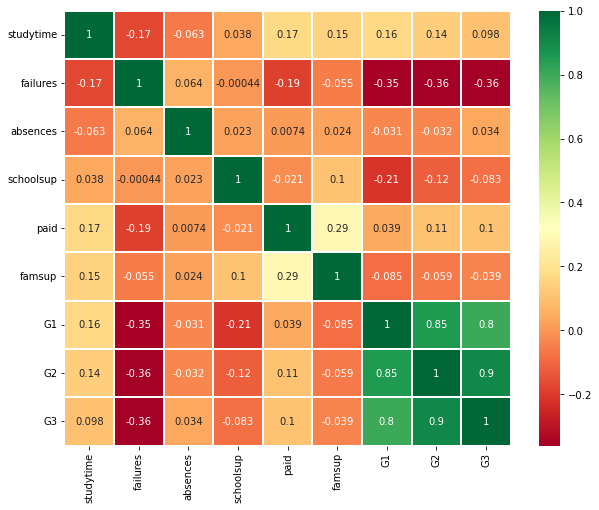

In [ ]:
# plot correlation matrix using seaborn
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


# Visualisasi data berdasarkan frekuensi masing - masing data studytime, failures, dan absences menggunakan matplotlib

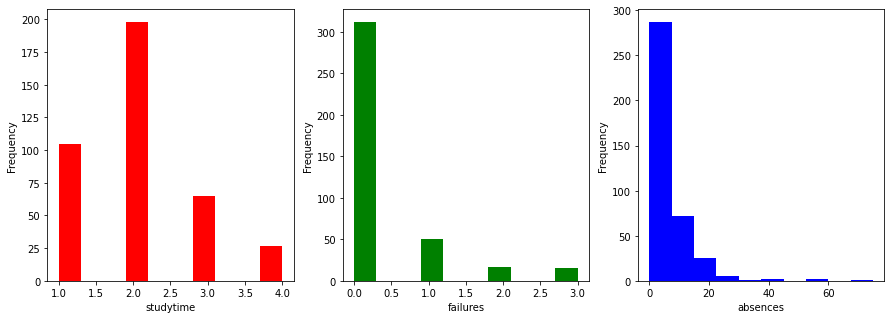

In [ ]:
# plot histogram of studytime, failures, absences in one row and three columns using matplotlib
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
df['studytime'].plot(kind='hist', ax=axes[0], color='red')
# set x name 
axes[0].set_xlabel('studytime')
df['failures'].plot(kind='hist', ax=axes[1], color='green')
axes[1].set_xlabel('failures')
df['absences'].plot(kind='hist', ax=axes[2], color='blue')
axes[2].set_xlabel('absences')
plt.show()

# Visualisasi data biner "0" dan "1" berdasarkan frekuensi pada masing - masing data schoolsup dan famsup menggunakan seaborn

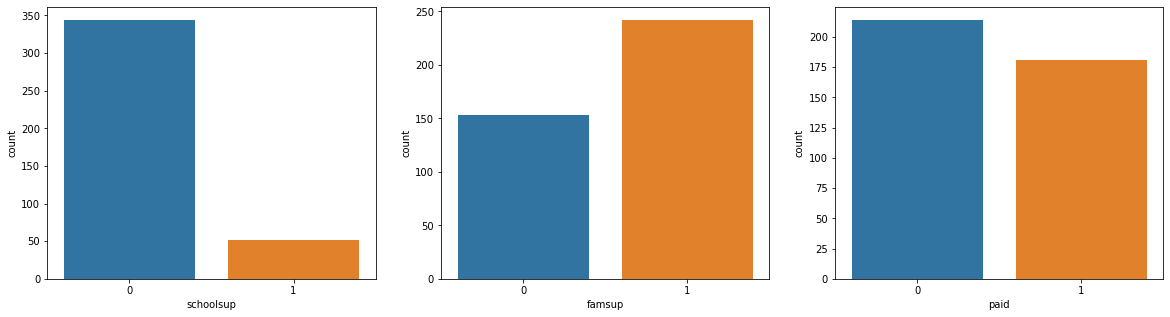

In [ ]:
# plot the schoolsup and famsup in one row and two columns using sns 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
sns.countplot(x='schoolsup', data=df, ax=axes[0])
sns.countplot(x='famsup', data=df, ax=axes[1])
sns.countplot(x='paid', data=df, ax=axes[2])
plt.show()

# Visualisasi data berdasarkan frekuensi pada masing - masing data G1, G2, dan G3 menggunakan seaborn

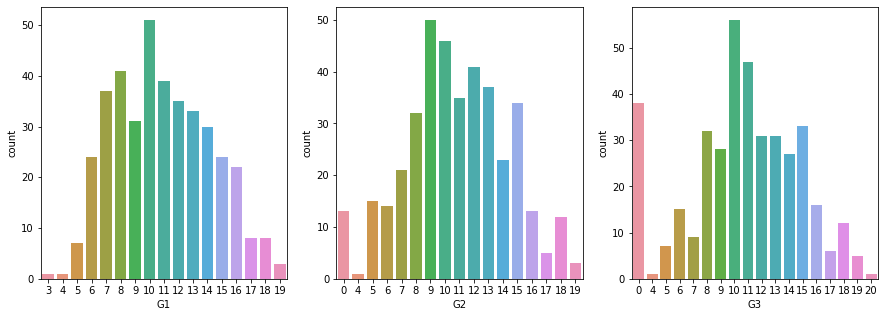

In [ ]:
# plot the G1, G2, and G3 in one row and three columns using sns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.countplot(x='G1', data=df, ax=axes[0])
sns.countplot(x='G2', data=df, ax=axes[1])
sns.countplot(x='G3', data=df, ax=axes[2])
plt.show()

# Select (Memilih) dan Read data feature dan target

In [ ]:
# select features and target
feature = df[['studytime', 'failures', 'absences','schoolsup','paid','famsup','G1', 'G2']]
target = df['G3']

feature.head()

,studytime,failures,absences,schoolsup,paid,famsup,G1,G2
0,2,0,6,1,0,0,5,6
1,2,0,4,0,0,1,5,5
2,2,3,10,1,1,0,7,8
3,3,0,2,0,1,1,15,14
4,2,0,4,0,1,1,6,10


# Membuat visualisasi untuk melihat distribusi data dari variabel feature dan variabel target menggunakan boxplot dari seaborn

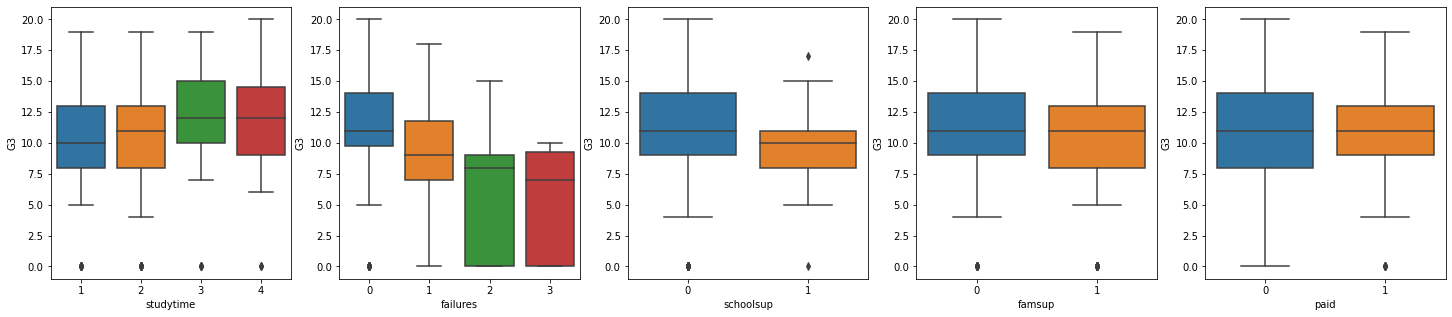

In [ ]:
# make boxplot using seaborn to see the distribution feature variable and target variable
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
sns.boxplot(x='studytime', y='G3', data=df, ax=axes[0])
sns.boxplot(x='failures', y='G3', data=df, ax=axes[1])
sns.boxplot(x='schoolsup', y='G3', data=df, ax=axes[2])
sns.boxplot(x='famsup', y='G3', data=df, ax=axes[3])
sns.boxplot(x='paid', y='G3', data=df, ax=axes[4])
plt.show() 

# Membuat visualisasi untuk melihat distribusi data dari variabel feature dan variabel target menggunakan barplot dari seaborn

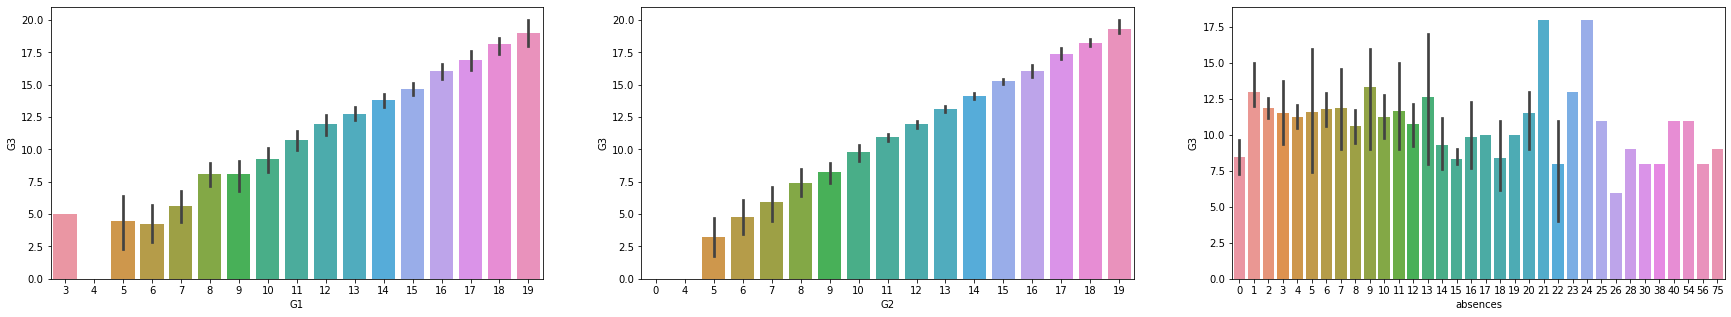

In [ ]:
# make bar plot using seaborn to see the distribution feature variable and target variable
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))
sns.barplot(x='G1', y='G3', data=df, ax=axes[0])
sns.barplot(x='G2', y='G3', data=df, ax=axes[1])
sns.barplot(x='absences', y='G3', data=df, ax=axes[2])
plt.show()

# Membuat visualisasi untuk melihat distribusi data dari variabel feature dan variabel target menggunakan boxplot dari seaborn

<AxesSubplot:xlabel='failures', ylabel='G3'>

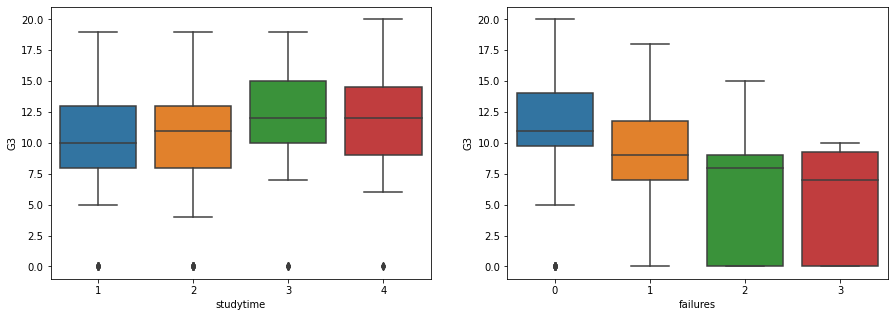

In [ ]:
# plot styudytime, failures, absences in one row and three columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# plot studytime
sns.boxplot(x='studytime', y='G3', data=df, ax=axes[0])
# plot failures
sns.boxplot(x='failures', y='G3', data=df, ax=axes[1])


# Melakukan Normalisasi pada data feature agar data yang digunakan tidak memiliki penyimpangan yang besar.

In [ ]:
# normalize the data attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(feature)
X = scaler.transform(feature)

X

array([[-0.04228585, -0.44994364,  0.03642446, ..., -1.25765629,
        -1.78246688, -1.25479105],
       [-0.04228585, -0.44994364, -0.21379577, ...,  0.7951298 ,
        -1.78246688, -1.52097927],
       [-0.04228585,  3.58932316,  0.53686493, ..., -1.25765629,
        -1.1791469 , -0.72241461],
       ...,
       [-1.23535078,  3.58932316, -0.33890588, ..., -1.25765629,
        -0.27416693, -0.72241461],
       [-1.23535078, -0.44994364, -0.71423623, ..., -1.25765629,
         0.02749306,  0.34233827],
       [-1.23535078, -0.44994364, -0.08868565, ..., -1.25765629,
        -0.87748691, -0.45622639]])

# Membagi dataset menjadi dataset training dan dataset testing, pembagian datanya memiliki persentasi dataset training 80% dan testing 20%

In [ ]:
# split the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)



# Proses prediksi data train dan data test yang akan menghasilkan nilai akurasi, MAE, MSE, dan RMSE

In [ ]:
import sklearn 
def fit_predict(regressor):
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print('Accuracy Score: ', regressor.score(X_test, y_test))
    print('Mean Absolute Error: ', sklearn.metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error: ', sklearn.metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error: ', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))

# Menggunakan model Linear Regression untuk proses prediksi

In [ ]:
# import the regressor
from sklearn.linear_model import LinearRegression
# create a regressor object
regressor = LinearRegression()
# fit the regressor with X and Y data
fit_predict(regressor)


Accuracy Score:  0.8017851104490852
Mean Absolute Error:  1.4123651167015472
Mean Squared Error:  5.468520447469257
Root Mean Squared Error:  2.338486785823101


# Menggunakan model Logistic Regression untuk proses prediksi

In [ ]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
# create a regressor object
regressor = LogisticRegression()
# fit the regressor with X and Y data
fit_predict(regressor)


Accuracy Score:  0.3291139240506329
Mean Absolute Error:  1.6582278481012658
Mean Squared Error:  8.012658227848101
Root Mean Squared Error:  2.8306639199749766


# Menggunakan model XGBRegressor untuk proses prediksi

In [ ]:
# import XGBRegressor
from xgboost import XGBRegressor
# create a regressor object
regressor = XGBRegressor()
# fit the regressor with X and Y data
fit_predict(regressor)

Accuracy Score:  0.7594965293975741
Mean Absolute Error:  1.365937083134357
Mean Squared Error:  6.6352136797415335
Root Mean Squared Error:  2.575890851674724


# Menggunakan model Random Forest Regressor untuk proses prediksi

In [ ]:
# import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# create a regressor object
regressor = RandomForestRegressor()
# fit the regressor with X and Y data
fit_predict(regressor)


Accuracy Score:  0.8400635125210942
Mean Absolute Error:  1.1546323086196504
Mean Squared Error:  4.412463433278797
Root Mean Squared Error:  2.1005864498465177


# Menggunakan model Decision Tree Regressor untuk proses prediksi

In [ ]:
# import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# create a regressor object
regressor = DecisionTreeRegressor(max_leaf_nodes=99 ,random_state=1)
# fit the regressor with X and Y data
fit_predict(regressor)


Accuracy Score:  0.816000180732237
Mean Absolute Error:  1.1994533474673152
Mean Squared Error:  5.076343034956252
Root Mean Squared Error:  2.2530741299292067


# Menggunakan model Gradien Boosting Regressor untuk proses prediksi

In [ ]:
# gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
# create a regressor object
regressor = GradientBoostingRegressor()
# fit the regressor with X and Y data
fit_predict(regressor)

Accuracy Score:  0.8528943738504418
Mean Absolute Error:  1.2038394222264044
Mean Squared Error:  4.05847475111092
Root Mean Squared Error:  2.014565648250491
